 Violeta García

<img style="float: left; margin: 15px 15px 15px 15px;" src="http://www.unionjalisco.mx/sites/default/files/styles/galeria/public/field/image/iteso_3_1.jpg?itok=M6pp1pEQ" width="180" height="50" />

# Simulación de Procesos Financieros

## <font color= blue > Tarea IX
    Valuación de Opciones: Put

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
>
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)


In [2]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
# aapl

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-01-17,50.0,call,AAPL200117C00050000,...,2019-11-27 00:59:43,2019-11-07 16:06:35,"{'contractSymbol': 'AAPL200117C00050000', 'str..."
2020-01-17,50.0,put,AAPL200117P00050000,...,2019-11-27 00:59:43,2019-11-08 14:34:24,"{'contractSymbol': 'AAPL200117P00050000', 'str..."
2020-01-17,55.0,call,AAPL200117C00055000,...,2019-11-27 00:59:43,2019-08-08 19:46:38,"{'contractSymbol': 'AAPL200117C00055000', 'str..."
2020-01-17,55.0,put,AAPL200117P00055000,...,2019-11-27 00:59:43,2019-09-30 14:16:34,"{'contractSymbol': 'AAPL200117P00055000', 'str..."
2020-01-17,60.0,call,AAPL200117C00060000,...,2019-11-27 00:59:43,2019-11-06 20:30:58,"{'contractSymbol': 'AAPL200117C00060000', 'str..."
...,...,...,...,...,...,...,...
2021-06-18,390.0,call,AAPL210618C00390000,...,2019-11-27 00:59:43,2019-11-26 16:06:51,"{'contractSymbol': 'AAPL210618C00390000', 'str..."
2021-09-17,390.0,call,AAPL210917C00390000,...,2019-11-27 00:59:43,2019-11-25 20:51:28,"{'contractSymbol': 'AAPL210917C00390000', 'str..."
2022-01-21,390.0,call,AAPL220121C00390000,...,2019-11-27 00:59:43,2019-11-26 19:55:13,"{'contractSymbol': 'AAPL220121C00390000', 'str..."


In [3]:
aapl_opt.loc[:, 'Type']

0       call
1        put
2       call
3        put
4       call
        ... 
1480    call
1481    call
1482    call
1483    call
1484    call
Name: Type, Length: 1485, dtype: object

In [4]:
pd.set_option('display.max_rows', 10)
aapl_opt.loc[:, 'Expiry']

0      2020-01-17
1      2020-01-17
2      2020-01-17
3      2020-01-17
4      2020-01-17
          ...    
1480   2021-06-18
1481   2021-09-17
1482   2022-01-21
1483   2020-02-21
1484   2020-02-21
Name: Expiry, Length: 1485, dtype: datetime64[ns]

In [5]:
fecha1 = '2020-06-19'
fecha2 = '2021-01-15'
put06 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='put')]
put06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
13,75.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-26 14:46:09,"{'contractSymbol': 'AAPL200619P00075000', 'str..."
21,80.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-11 19:09:55,"{'contractSymbol': 'AAPL200619P00080000', 'str..."
29,85.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-15 20:09:22,"{'contractSymbol': 'AAPL200619P00085000', 'str..."
37,90.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-15 17:15:44,"{'contractSymbol': 'AAPL200619P00090000', 'str..."
45,95.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-26 16:58:01,"{'contractSymbol': 'AAPL200619P00095000', 'str..."
...,...,...,...,...,...,...,...
1288,300.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-26 14:45:42,"{'contractSymbol': 'AAPL200619P00300000', 'str..."
1332,310.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-22 14:52:43,"{'contractSymbol': 'AAPL200619P00310000', 'str..."
1369,320.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-21 16:31:54,"{'contractSymbol': 'AAPL200619P00320000', 'str..."
1405,330.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-14 19:53:37,"{'contractSymbol': 'AAPL200619P00330000', 'str..."


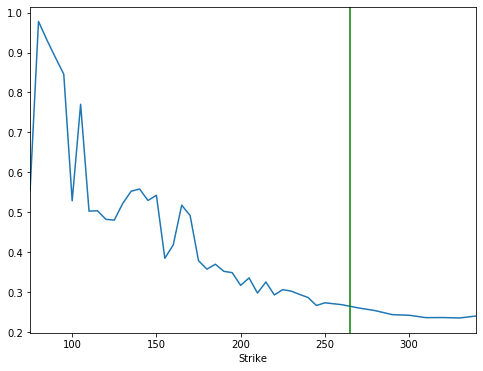

In [6]:
ax = put06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06.Underlying_Price.iloc[0], color='g');
# call06.Underlying_Price

In [7]:
put06 = aapl_opt.loc[(aapl_opt.Expiry==fecha1) & (aapl_opt.Type=='put')]
put06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
13,75.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-26 14:46:09,"{'contractSymbol': 'AAPL200619P00075000', 'str..."
21,80.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-11 19:09:55,"{'contractSymbol': 'AAPL200619P00080000', 'str..."
29,85.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-15 20:09:22,"{'contractSymbol': 'AAPL200619P00085000', 'str..."
37,90.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-15 17:15:44,"{'contractSymbol': 'AAPL200619P00090000', 'str..."
45,95.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-26 16:58:01,"{'contractSymbol': 'AAPL200619P00095000', 'str..."
...,...,...,...,...,...,...,...
1288,300.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-26 14:45:42,"{'contractSymbol': 'AAPL200619P00300000', 'str..."
1332,310.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-22 14:52:43,"{'contractSymbol': 'AAPL200619P00310000', 'str..."
1369,320.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-21 16:31:54,"{'contractSymbol': 'AAPL200619P00320000', 'str..."
1405,330.0,2020-06-19,put,...,2019-11-27 00:59:43,2019-11-14 19:53:37,"{'contractSymbol': 'AAPL200619P00330000', 'str..."


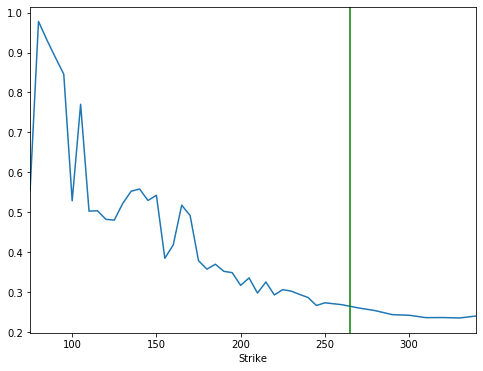

In [8]:
ax = put06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06.Underlying_Price.iloc[0], color='g')

In [9]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

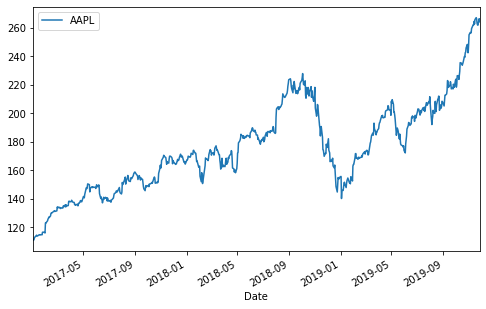

In [10]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [11]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

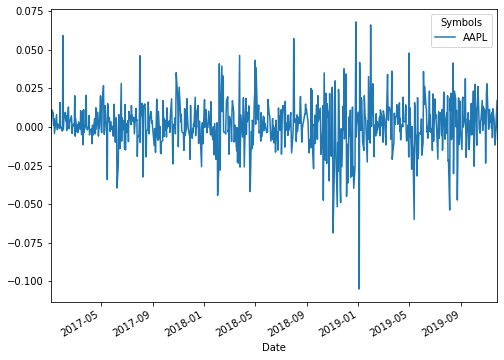

In [12]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [13]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2019-11-29,227.5,call,AAPL191129C00227500,...,2019-11-27 00:59:43,2019-11-19 15:54:29,"{'contractSymbol': 'AAPL191129C00227500', 'str..."
2019-11-29,302.5,call,AAPL191129C00302500,...,2019-11-27 00:59:43,2019-11-19 20:25:51,"{'contractSymbol': 'AAPL191129C00302500', 'str..."
2019-11-29,245.0,put,AAPL191129P00245000,...,2019-11-27 00:59:43,2019-11-26 20:57:38,"{'contractSymbol': 'AAPL191129P00245000', 'str..."
2019-11-29,170.0,call,AAPL191129C00170000,...,2019-11-27 00:59:43,2019-11-18 05:13:22,"{'contractSymbol': 'AAPL191129C00170000', 'str..."
2019-11-29,247.5,call,AAPL191129C00247500,...,2019-11-27 00:59:43,2019-11-26 20:38:03,"{'contractSymbol': 'AAPL191129C00247500', 'str..."
...,...,...,...,...,...,...,...
2022-01-21,180.0,put,AAPL220121P00180000,...,2019-11-27 00:59:43,2019-11-21 17:32:55,"{'contractSymbol': 'AAPL220121P00180000', 'str..."
2022-01-21,180.0,call,AAPL220121C00180000,...,2019-11-27 00:59:43,2019-11-25 20:58:34,"{'contractSymbol': 'AAPL220121C00180000', 'str..."
2022-01-21,235.0,call,AAPL220121C00235000,...,2019-11-27 00:59:43,2019-11-26 15:45:06,"{'contractSymbol': 'AAPL220121C00235000', 'str..."


In [14]:
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==240) & (aapl_opt.Expiry=='2021-01-15')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
827,240.0,2021-01-15,put,...,2019-11-27 00:59:43,2019-11-26 20:44:36,"{'contractSymbol': 'AAPL210115P00240000', 'str..."


In [15]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00240000',
 'strike': 240.0,
 'currency': 'USD',
 'lastPrice': 16.65,
 'change': -0.30000114,
 'percentChange': -1.7699182,
 'volume': 48,
 'openInterest': 0,
 'bid': 16.0,
 'ask': 20.0,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1574801076,
 'impliedVolatility': 0.2866282275390625,
 'inTheMoney': False}

In [16]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  264.76


In [17]:
# Descargamos los precios de apple
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl

Symbols,AAPL
Date,
2017-01-03,110.954
2017-01-04,110.830
2017-01-05,111.393
2017-01-06,112.635
2017-01-09,113.667
...,...
2019-11-20,263.190
2019-11-21,262.010
2019-11-22,261.780


In [18]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-1.119e-03
2017-01-05,5.085e-03
2017-01-06,1.115e-02
2017-01-09,9.160e-03
2017-01-10,1.009e-03
...,...
2019-11-20,-1.164e-02
2019-11-21,-4.483e-03
2019-11-22,-8.779e-04


In [19]:
from datetime import date
Hoy = date.today()
# ndays = 416
nscen = 10
dates = pd.date_range(start=Hoy, end='2021-01-15') #periods = ndays)
ndays = len(dates)
dates

DatetimeIndex(['2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
               '2019-11-30', '2019-12-01', '2019-12-02', '2019-12-03',
               '2019-12-04', '2019-12-05',
               ...
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15'],
              dtype='datetime64[ns]', length=417, freq='D')

In [20]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()


,0,1,2,...,7,8,9
2019-11-26,-1.111e-02,1.287e-02,-1.139e-02,...,-6.708e-03,-2.915e-02,-3.594e-04
2019-11-27,3.823e-04,-1.287e-04,1.586e-04,...,2.115e-04,-7.467e-04,3.544e-06
2019-11-28,-3.866e-06,1.324e-06,-3.225e-06,...,-6.587e-06,-6.425e-06,4.276e-08
2019-11-29,-9.777e-08,1.072e-08,-7.245e-08,...,1.720e-08,2.867e-08,-1.089e-09
2019-11-30,-1.444e-09,-1.286e-10,-6.490e-10,...,-8.780e-11,-1.385e-10,1.751e-11
...,...,...,...,...,...,...,...
2021-01-11,0.000e+00,0.000e+00,0.000e+00,...,0.000e+00,-0.000e+00,0.000e+00
2021-01-12,0.000e+00,-0.000e+00,0.000e+00,...,0.000e+00,-0.000e+00,-0.000e+00
2021-01-13,0.000e+00,-0.000e+00,-0.000e+00,...,0.000e+00,0.000e+00,-0.000e+00
2021-01-14,0.000e+00,0.000e+00,0.000e+00,...,-0.000e+00,-0.000e+00,0.000e+00


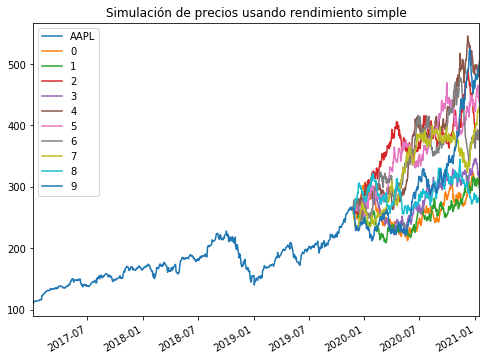

In [21]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

0.49313903798784375

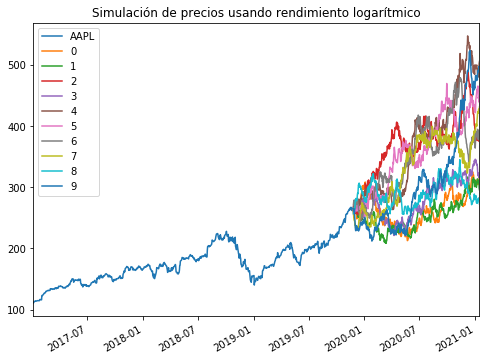

In [22]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

In [23]:
print('Las std usando rendimientos logarítmicos y simples son iguales')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son iguales


(0.015674033216930793, 0.015707790006734453)

In [24]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0011889485807206996, 0.015707790006734453)

In [25]:
# Tasa de bonos de 1 yr de fecha 11/01/19 -> 1.53%
r = 0.0153/360 # Tasa diaria

In [26]:
ndays = 416
nscen = 10
dates = pd.date_range(start='2019-11-12', periods = ndays)
dates

DatetimeIndex(['2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
               '2019-11-16', '2019-11-17', '2019-11-18', '2019-11-19',
               '2019-11-20', '2019-11-21',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=416, freq='D')

In [27]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato


,0,1,2,...,7,8,9
2019-11-12,-0.020,0.003,0.011,...,0.015,-0.006,1.171e-02
2019-11-13,-0.009,-0.011,0.022,...,0.017,0.021,2.854e-02
2019-11-14,0.025,-0.031,0.006,...,0.034,0.021,2.486e-02
2019-11-15,0.028,-0.044,-0.008,...,0.024,0.010,2.012e-02
2019-11-16,0.015,-0.052,0.022,...,0.041,0.006,-2.075e-04
...,...,...,...,...,...,...,...
2020-12-27,0.340,-0.607,0.386,...,-0.253,0.154,2.745e-01
2020-12-28,0.350,-0.612,0.354,...,-0.235,0.129,2.798e-01
2020-12-29,0.356,-0.599,0.349,...,-0.224,0.147,3.019e-01
2020-12-30,0.393,-0.594,0.342,...,-0.208,0.162,3.141e-01


In [28]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2019-11-12,259.111,265.086,267.211,...,268.406,262.774,267.403
2019-11-13,261.907,261.332,270.287,...,268.844,269.782,271.942
2019-11-14,270.882,256.266,265.882,...,273.318,269.966,270.942
2019-11-15,271.692,252.796,262.297,...,270.704,267.015,269.662
2019-11-16,268.376,250.992,270.297,...,275.364,265.765,264.235
...,...,...,...,...,...,...,...
2020-12-27,371.389,144.054,388.750,...,205.183,308.388,347.762
2020-12-28,375.087,143.334,376.728,...,208.902,300.612,349.631
2020-12-29,377.452,145.244,374.774,...,211.353,305.996,357.446
2020-12-30,391.503,145.848,371.879,...,214.638,310.906,361.814


In [29]:
# sim_closes.plot(figsize=(8,6));

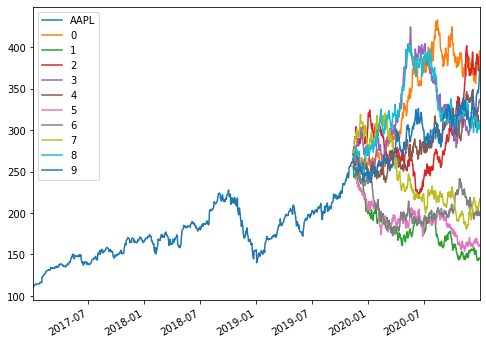

In [30]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [31]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00240000',
 'strike': 240.0,
 'currency': 'USD',
 'lastPrice': 16.65,
 'change': -0.30000114,
 'percentChange': -1.7699182,
 'volume': 48,
 'openInterest': 0,
 'bid': 16.0,
 'ask': 20.0,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1574801076,
 'impliedVolatility': 0.2866282275390625,
 'inTheMoney': False}

In [54]:
sigma = 0.2866282275390625/np.sqrt(252)
sigma

0.0180558811618951

In [55]:
from datetime import date
Hoy = date.today()
K=240  # strike price
ndays = 416
nscen = 1000
dates = pd.date_range(start= Hoy, periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

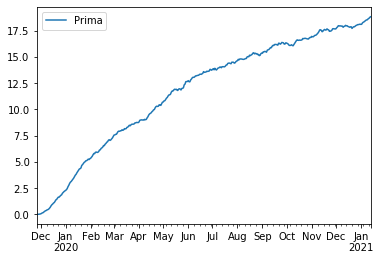

In [56]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [57]:
put.iloc[-1]

Prima    18.835
Name: 2021-01-14 00:00:00, dtype: float64

In [59]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(10.062331120085632, 27.608018729295303)
(10.079090932582067, 27.591258916798864)


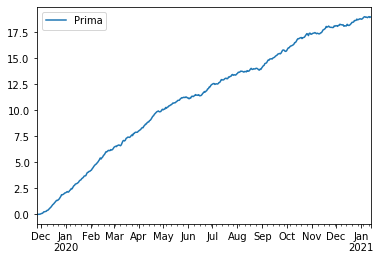

In [37]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) *np.fmax(strike - sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [38]:
put.iloc[-1]

Prima    18.982
Name: 2021-01-14 00:00:00, dtype: float64

In [39]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)



(10.531698836220533, 27.4314756497711)
(10.54784166840444, 27.4153328175872)


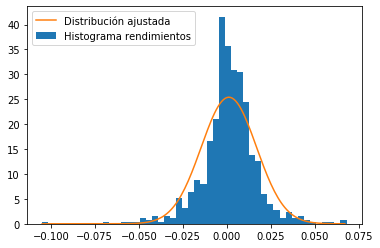

In [40]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

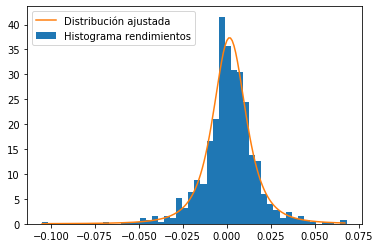

In [41]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen,df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

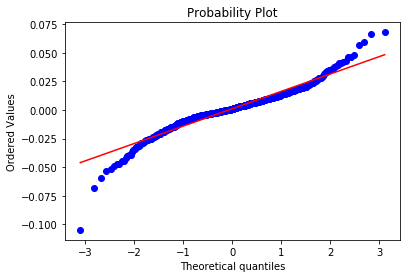

In [42]:
st.probplot(ren['AAPL'], dist='norm', plot=plt);

In [43]:
ndays = 416 
nscen = 10

In [44]:
prob = y/np.sum(y)
values = x[1:]

In [45]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist


,0,1,2,...,7,8,9
2019-11-26,-0.005,-0.008,-0.001,...,-0.001,0.002,0.002
2019-11-27,0.009,-0.005,0.006,...,0.023,0.040,-0.005
2019-11-28,-0.008,0.013,0.023,...,0.006,0.009,0.009
2019-11-29,0.009,0.037,0.009,...,0.006,-0.008,-0.001
2019-11-30,0.023,-0.015,0.009,...,0.006,0.002,-0.005
...,...,...,...,...,...,...,...
2021-01-10,-0.008,0.020,-0.001,...,0.023,-0.001,0.002
2021-01-11,-0.001,0.037,-0.005,...,0.013,-0.029,0.006
2021-01-12,-0.025,0.002,0.013,...,-0.012,-0.005,-0.008
2021-01-13,0.009,0.016,-0.008,...,-0.018,-0.005,-0.032


In [46]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2019-11-26,263.078,262.169,263.989,...,263.989,264.904,264.904
2019-11-27,265.520,260.966,265.520,...,270.153,275.819,263.689
2019-11-28,263.389,264.302,271.719,...,271.719,278.379,266.137
2019-11-29,265.834,274.241,274.241,...,273.294,276.145,265.834
2019-11-30,272.041,270.165,276.787,...,274.879,276.787,264.615
...,...,...,...,...,...,...,...
2021-01-10,734.480,773.601,1242.664,...,1082.070,1112.436,709.505
2021-01-11,733.645,802.693,1236.964,...,1095.900,1080.839,713.619
2021-01-12,715.277,804.559,1252.773,...,1083.351,1075.881,707.892
2021-01-13,721.917,817.666,1242.720,...,1063.561,1070.946,685.410


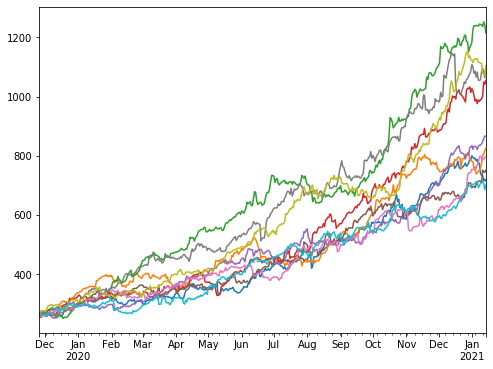

In [47]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

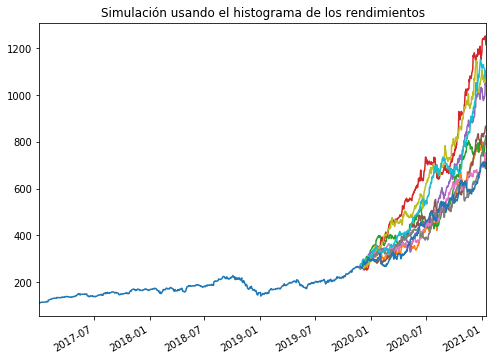

In [48]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [49]:
K=240
ndays = 416
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

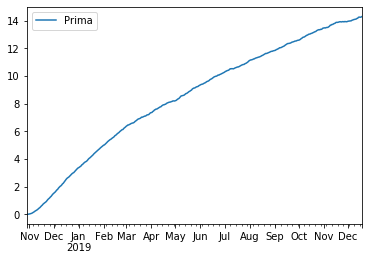

In [50]:

strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [51]:
put_hist.iloc[-1]

Prima    14.286
Name: 2019-12-18 00:00:00, dtype: float64

In [52]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00240000',
 'strike': 240.0,
 'currency': 'USD',
 'lastPrice': 16.65,
 'change': -0.30000114,
 'percentChange': -1.7699182,
 'volume': 48,
 'openInterest': 0,
 'bid': 16.0,
 'ask': 20.0,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1574801076,
 'impliedVolatility': 0.2866282275390625,
 'inTheMoney': False}

In [60]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(12.410981990598486, 16.161976362965497)
(12.413254250931077, 16.159704102632908)
